In [32]:
# import keras
# # from keras.datasets import fashion_mnist  # new with Keras 2.1.2.  Yah!!
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras import backend as K

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from pathlib import Path


Using TensorFlow backend.


In [2]:
# Path to folders with training data
uninfected = Path("cell_images") / "Uninfected"
parasitized = Path("cell_images") / "Parasitized"

images = []
labels = []



In [3]:
# Load all the not-dog images
for img in uninfected.glob("*.png"):
    # Load the image from disk
    img = image.load_img(img,target_size=(128,128))

    # Convert the image to a numpy array
    image_array = image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)

    # For each 'not dog' image, the expected value should be 0
    labels.append(0)



In [4]:
# Load all the dog images
for img in parasitized.glob("*.png"):
    # Load the image from disk
#     img = image.load_img(img,resize=64,64)
    img = image.load_img(img,target_size=(128,128))

    # Convert the image to a numpy array
    image_array = image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)

    # For each 'dog' image, the expected value should be 1
    labels.append(1)

In [5]:
print(len(images))
print(len(labels))

27558
27558


In [6]:
# Create a single numpy array with all the images we loaded
x_data = np.array(images)

# Also convert the labels to a numpy array
y_data = np.array(labels)

In [7]:
x_data.shape,y_data.shape

((27558, 128, 128, 3), (27558,))

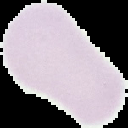

In [8]:
from keras.preprocessing import image
image.array_to_img(x_data[1])

In [9]:
%%time
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

CPU times: user 2.32 s, sys: 28.2 s, total: 30.5 s
Wall time: 4min 1s


In [10]:
# Number of classes - do not change unless the data changes
num_classes = 1

In [ ]:
# sizes of batch and # of epochs of data
batch_size = 250
epochs = 20

In [12]:
#   Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train[0:3])


x_train shape: (22046, 128, 128, 3)
x_test shape: (5512, 128, 128, 3)
[0 0 1]


In [33]:
input_shape = x_train.shape[1:]
input_shape

(128, 128, 3)

In [34]:
# # y_train = keras.utils.to_categorical(y_train, num_classes)
# # y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:1]) 
print(y_train[1990:2000])# verify one-hot encoding

[0]
[1 0 1 0 1 0 0 0 1 0]


In [35]:
# Define the model
model = Sequential()

In [36]:
from keras.callbacks import EarlyStopping


In [37]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=12)

In [38]:
# Create a CNN to classify the images
model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

In [39]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[early_stop])



Train on 22046 samples, validate on 5512 samples
Epoch 1/12
22046/22046 [==============================] - 1083s 49ms/step - loss: 0.7203 - acc: 0.5584 - val_loss: 0.6595 - val_acc: 0.6185
Epoch 2/12
22046/22046 [==============================] - 1068s 48ms/step - loss: 0.6696 - acc: 0.5943 - val_loss: 0.6527 - val_acc: 0.6259
Epoch 3/12
22046/22046 [==============================] - 1060s 48ms/step - loss: 0.6480 - acc: 0.6196 - val_loss: 0.6295 - val_acc: 0.6323
Epoch 4/12
22046/22046 [==============================] - 1057s 48ms/step - loss: 0.6389 - acc: 0.6355 - val_loss: 0.6880 - val_acc: 0.5664
Epoch 5/12
22046/22046 [==============================] - 1049s 48ms/step - loss: 0.6110 - acc: 0.6693 - val_loss: 0.6498 - val_acc: 0.6050
Epoch 6/12
22046/22046 [==============================] - 1067s 48ms/step - loss: 0.5842 - acc: 0.7069 - val_loss: 0.5527 - val_acc: 0.7282
Epoch 7/12
22046/22046 [==============================] - 1050s 48ms/step - loss: 0.5243 - acc: 0.7594 - val_lo

Test loss: 0.19105899712971056
Test accuracy: 0.933055152394775


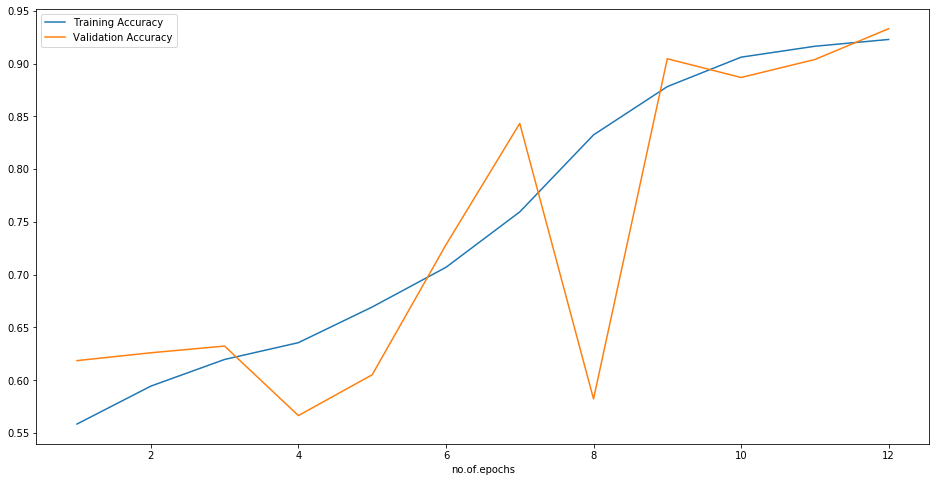

In [40]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
epoch_list = list(range(1, len(hist.history['acc']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.xlabel("no.of.epochs")
plt.show()

In [41]:
# Save neural network structure
from pathlib import Path
model_structure = model.to_json()
f = Path("Malaria_fresh_model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("Malaria_fresh_model_weights.h5")

In [80]:

# csv_File_Path = (r'./A_Z_Hand_Data.csv')


# count = 1
# last_digit_Name =  None

# image_Folder_Path = (r'../CNN')# Target folder path

# Alphabet_Mapping_List = list(string.ascii_uppercase)

# for alphabet in Alphabet_Mapping_List:
#     path = image_Folder_Path + '/' + alphabet
#     if not os.path.exists(path):
#         os.makedirs(path)

# with open(csv_File_Path, newline='') as csvfile:
#     reader = csv.reader(csvfile, delimiter=',', quotechar='|')
#     count = 0
#     for row in reader:
#         digit_Name = row.pop(0)
#         image_array = np.asarray(row)
#         image_array = image_array.reshape(28, 28)
#         new_image = Image.fromarray(image_array.astype('uint8'))

#         if last_digit_Name != str(Alphabet_Mapping_List[(int)(digit_Name)]):
#             last_digit_Name = str(Alphabet_Mapping_List[(int)(digit_Name)])
#             count = 0
#             print ("")
#             print ("Prcessing Alphabet - " + str (last_digit_Name))
        
#         image_Path = image_Folder_Path + '/' + last_digit_Name + '/' + str(last_digit_Name) + '-' + str(count) + '.png'
#         new_image.save(image_Path)
#         count = count + 1

#         if count % 1000 == 0:
#             print ("Images processed: " + str(count))

In [81]:
# Number of classes - do not change unless the data changes
num_classes = 26

In [82]:
# sizes of batch and # of epochs of data
batch_size = 128
epochs = 24

In [84]:
y_data

array([ 0,  0,  0, ..., 25, 25, 25])

In [26]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [27]:
#   Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train[0:3])



x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
[9 0 0]


In [28]:
a = 2
a /= 2
a

1.0

In [29]:
# convert class vectors to binary class matrices.  One-hot encoding
#  3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:1]) 
print(y_train[1:2])# verify one-hot encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [30]:
# Define the model
model = Sequential()

In [35]:
# Create a CNN to classify the images
model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
#   define compile to minimize categorical loss, use ada delta optimized, and optimize to maximizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/24





60000/60000 [==============================] - 122s 2ms/step - loss: 0.6972 - acc: 0.7450 - val_loss: 0.4551 - val_acc: 0.8349
Epoch 2/24
60000/60000 [==============================] - 119s 2ms/step - loss: 0.4491 - acc: 0.8382 - val_loss: 0.3887 - val_acc: 0.8591
Epoch 3/24
60000/60000 [==============================] - 119s 2ms/step - loss: 0.3888 - acc: 0.8606 - val_loss: 0.3486 - val_acc: 0.8738
Epoch 4/24
60000/60000 [==============================] - 119s 2ms/step - loss: 0.3590 - acc: 0.8720 - val_loss: 0.3299 - val_acc: 0.8828
Epoch 5/24
60000/60000 [==============================] - 119s 2ms/step - loss: 0.3365 - acc: 0.8788 - val_loss: 0.3130 - val_acc: 0.8858
Epoch 6/24
60000/60000 [==============================] - 119s 2ms/step - loss: 0.3193 - acc: 0.8856 - val_loss: 0.3012 - val_acc: 0.8919
Epoch 7/24
60000/6

Test loss: 0.25708578537106513
Test accuracy: 0.9089


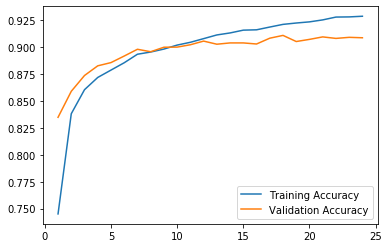

In [37]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['acc']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [38]:
#print summary statistics of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [39]:
# Save neural network structure
from pathlib import Path
model_structure = model.to_json()
f = Path("cnn_mnist_model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("cnn_mnist_model_weights.h5")